# Introduction

As part of your duties as senior data scientist for the famous ThomasTrain company, you are assigned to understand the satisfaction of the customers even without a direct evaluation.
To accomplish this task, the company provided you with the “trains_dataset.csv”.
 Understanding the customers’ satisfaction will help the marketing team to effectively target users with promotions and making the retention higher.

Assignment:
- Perform an Explanatory data analysis (EDA) with visualization;
- Generate a training and test set. The test set should be used only at the end;
- Preprocess the dataset (remove outliers, impute missing values, encode categorical features with one hot encoding, not necessarily in this order). Your goal is to estimate whether a customer is satisfied;
- Define whether this is a regression, classification or clustering problem, explain why and choose your model design accordingly. Test at least 3 different models. First, create a validation set from the training set to analyze the behaviour with the default hyperparameters. Then use cross-validation to find the best set of hyperparameters. You must describe every hyperparameter tuned (the more, the better);
- Select the best architecture using the right metric;
- Finally, compute the performances of the test set.

# Importing libraries

Import necessary libraries and read the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, pointbiserialr
import os
import requests

# Reading the input file

In [2]:
df_trains = pd.read_csv('trains.csv')

# EDA

## 1) Understanding the dataset

### 1.1) General overview of the dataset

Using the function *.head()*, we can extract from the dataset the first x columns (x=5 by default, but we can change this number). They are not useful for analytic purposes, but still enable us to visualize the dataset.

In [3]:
df_trains.head()

,Legroom Service Rating,Onboard General Rating,Food'n'Drink Rating,Age,Departure Arrival Time Rating,Onboard WiFi Rating,Ticket ID,Checkin Rating,Track Location Rating,Baggage Handling Rating,...,Online Booking Rating,Satisfied,Onboard Entertainment Rating,Date and Time,Distance,Seat Comfort Rating,Work or Leisure,Departure Delay in Minutes,Onboard Service Rating,Cleanliness Rating
0,3,5,5,13,4,3,4718594,4,1,4,...,3,N,5,2016-02-19 10:53,460,5,leisure,25,4,5
1,5,4,1,25,2,3,1048580,1,3,3,...,3,N,1,2016-02-26 15:39,235,1,work,1,1,1
2,3,4,5,26,2,2,3670024,4,2,4,...,2,Y,5,2016-02-26 07:26,1142,5,work,0,4,5
3,5,4,2,25,5,2,3145737,1,5,3,...,5,N,2,2016-02-27 08:32,562,2,work,11,2,2
4,4,3,4,61,3,3,5767177,3,3,4,...,3,Y,3,2016-02-27 14:37,214,5,work,0,3,3


### 1.2) Showing the dimension of the dataset

In [4]:
print ('The shape of the given dataset is {}. It contains {} rows and {} columns '.format(df_trains.shape,df_trains.shape[0],df_trains.shape[1]))

The shape of the given dataset is (129880, 25). It contains 129880 rows and 25 columns 


The dataset has 129880 rows and 25 columns

### 1.3) Gathering information from data

The visulaization *.info()* let us notice that almost every column has complete informations (hence, 0 null values), only 'Arrival delay in Minutes' column has some missing values.

Moreover we can see that among 25 variables, only 6 are categorical, while 19 are numerical.

In [5]:
df_trains.info()  # outputs column names and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Legroom Service Rating         129880 non-null  int64  
 1   Onboard General Rating         129880 non-null  int64  
 2   Food'n'Drink Rating            129880 non-null  int64  
 3   Age                            129880 non-null  int64  
 4   Departure Arrival Time Rating  129880 non-null  int64  
 5   Onboard WiFi Rating            129880 non-null  int64  
 6   Ticket ID                      129880 non-null  int64  
 7   Checkin Rating                 129880 non-null  int64  
 8   Track Location Rating          129880 non-null  int64  
 9   Baggage Handling Rating        129880 non-null  int64  
 10  Arrival Delay in Minutes       129487 non-null  float64
 11  Ticket Class                   129880 non-null  object 
 12  Loyalty                       

 df_trains.info() shows that the variable "Arrival Delay in Minutes" is the only variable which presents missing values. It also shows that the variables "Ticket Class", "Loyalty", "Gender", "Satisfied" and "Date and Time" are categoricals, while all the others are integeres or floats numbers.

### 1.2.1) Check for duplication

In [6]:
df_trains.nunique()

Legroom Service Rating                6
Onboard General Rating                6
Food'n'Drink Rating                   6
Age                                  75
Departure Arrival Time Rating         6
Onboard WiFi Rating                   6
Ticket ID                        129880
Checkin Rating                        6
Track Location Rating                 6
Baggage Handling Rating               5
Arrival Delay in Minutes            472
Ticket Class                          3
Loyalty                               2
Gender                                2
Boarding Rating                       6
Online Booking Rating                 6
Satisfied                             2
Onboard Entertainment Rating          6
Date and Time                     22667
Distance                           3821
Seat Comfort Rating                   6
Work or Leisure                       2
Departure Delay in Minutes          466
Onboard Service Rating                6
Cleanliness Rating                    6


We can notice that 'Ticket ID' represents an identifiers column with likely no influence on our classification task

## Data Cleaning

### 1.4) Handling missing values

Even though it seems like a data cleaning task, our approach in EDA involves addressing missing values to facilitate data plotting and enhance visualization. Specifically, our method for handling missing values involves replacing them with the mode.

Our aim is to retain maximum information for model accuracy, avoiding deletion of rows or columns. This approach ensures a more comprehensive dataset, supporting the development of a more precise model.

In [7]:
# Check for missing values

missing_values = df_trains.isnull().sum()
missing_values

Legroom Service Rating             0
Onboard General Rating             0
Food'n'Drink Rating                0
Age                                0
Departure Arrival Time Rating      0
Onboard WiFi Rating                0
Ticket ID                          0
Checkin Rating                     0
Track Location Rating              0
Baggage Handling Rating            0
Arrival Delay in Minutes         393
Ticket Class                       0
Loyalty                            0
Gender                             0
Boarding Rating                    0
Online Booking Rating              0
Satisfied                          0
Onboard Entertainment Rating       0
Date and Time                      0
Distance                           0
Seat Comfort Rating                0
Work or Leisure                    0
Departure Delay in Minutes         0
Onboard Service Rating             0
Cleanliness Rating                 0
dtype: int64

In particular, from this visualization, we notice that 'Arrival Delay in minutes' column has 393 missing values.

In [8]:
df_trains_without_NaN = df_trains.copy()

for column in df_trains.columns:
    df_trains_without_NaN[column].fillna(df_trains[column].mode()[0], inplace=True)
df_trains_without_NaN.isnull().sum()

Legroom Service Rating           0
Onboard General Rating           0
Food'n'Drink Rating              0
Age                              0
Departure Arrival Time Rating    0
Onboard WiFi Rating              0
Ticket ID                        0
Checkin Rating                   0
Track Location Rating            0
Baggage Handling Rating          0
Arrival Delay in Minutes         0
Ticket Class                     0
Loyalty                          0
Gender                           0
Boarding Rating                  0
Online Booking Rating            0
Satisfied                        0
Onboard Entertainment Rating     0
Date and Time                    0
Distance                         0
Seat Comfort Rating              0
Work or Leisure                  0
Departure Delay in Minutes       0
Onboard Service Rating           0
Cleanliness Rating               0
dtype: int64

We used a single *for* loop, that iterates over the columns of the dataframe and replaces the missing rows of each column with its mode. Using the command *.isnull().sum()*, we notice that there are no longer columns containing missing values.

### 1.5) Data Reduction

We decided to remove the column "Ticket ID" and "Date and Time", assuming they don’t have any predictive power to predict the dependent variable

In [9]:
# Remove "Ticket ID" and "Date and Time" columns from the dataset
df_trains_filtered = df_trains_without_NaN.drop(['Ticket ID', 'Date and Time'], axis = 1)

### 1.6) Outlier Detection

Recall that we define as "outlier" any observation - for a given variable - differing more than a certain small quantity with respect to the other observations of that variable. In simpler words, any data point far away from the distribution of data points is regarded as an outlier. In order to visualize such outliers for every numerical variables, we are going to create several boxplots. Then we will look at every boxplot and points not included in the quartiles will be outilers.

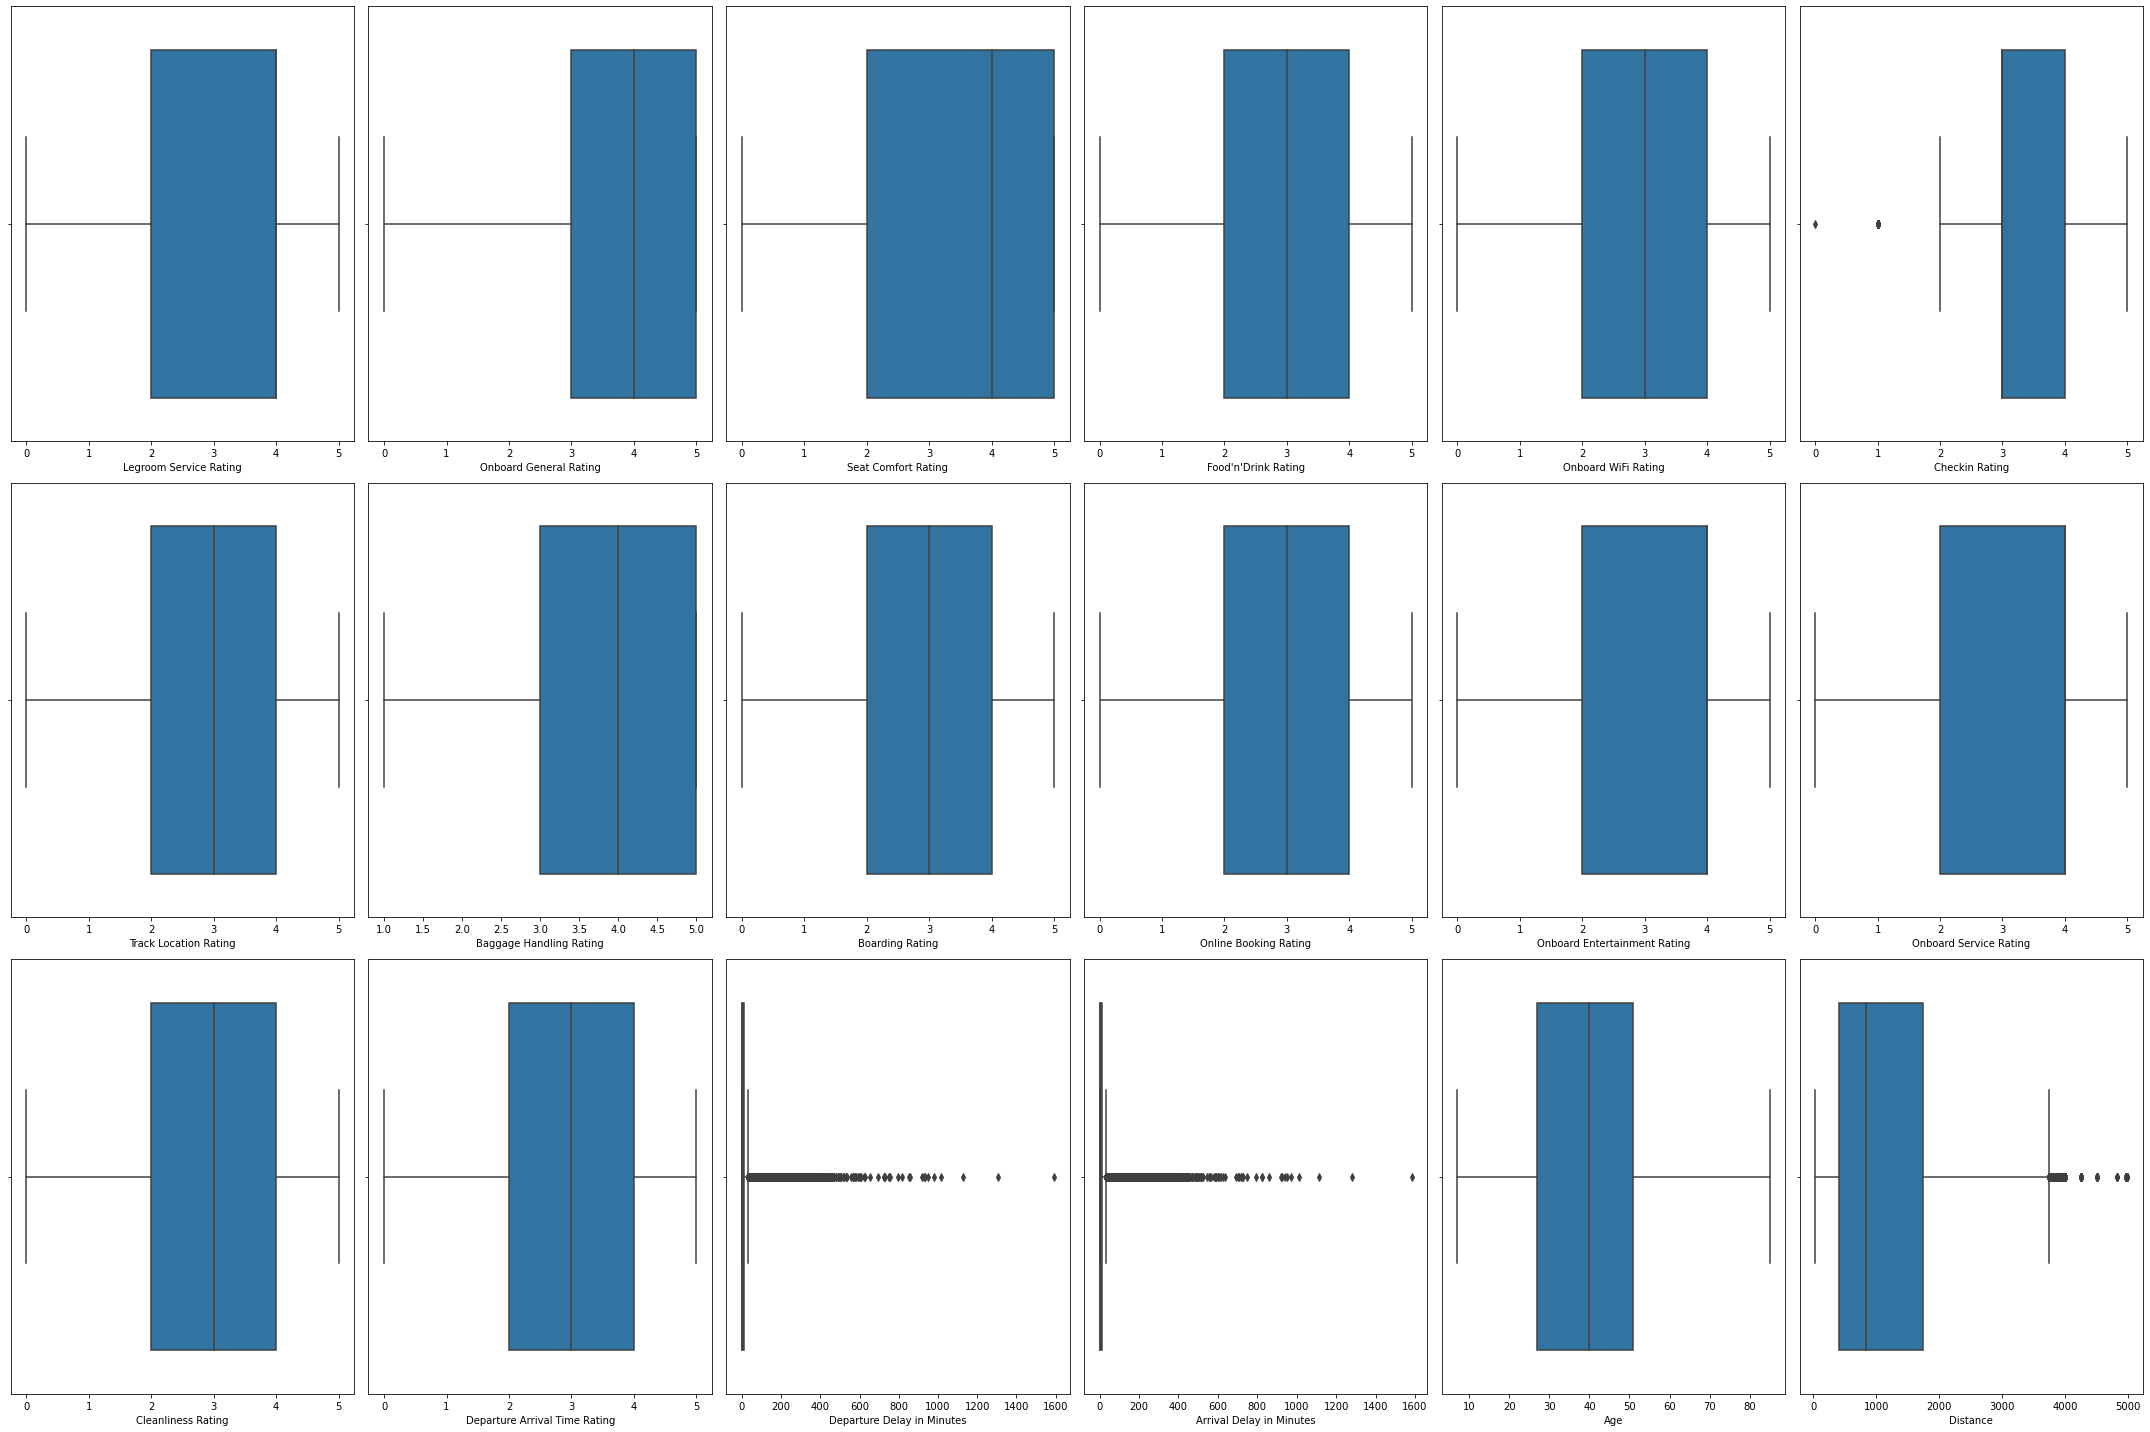

In [10]:
# Creating the boxplots
fig, axes = plt.subplots(3, 6, figsize=(30, 20))

sns.boxplot(ax=axes[0, 0], x=df_trains_filtered["Legroom Service Rating"])
sns.boxplot(ax=axes[0, 1], x=df_trains_filtered["Onboard General Rating"])
sns.boxplot(ax=axes[0, 2], x=df_trains_filtered["Seat Comfort Rating"])
sns.boxplot(ax=axes[0, 3], x=df_trains_filtered["Food'n'Drink Rating"])
sns.boxplot(ax=axes[0, 4], x=df_trains_filtered["Onboard WiFi Rating"])
sns.boxplot(ax=axes[0, 5], x=df_trains_filtered["Checkin Rating"])
sns.boxplot(ax=axes[1, 0], x=df_trains_filtered["Track Location Rating"])
sns.boxplot(ax=axes[1, 1], x=df_trains_filtered["Baggage Handling Rating"])
sns.boxplot(ax=axes[1, 2], x=df_trains_filtered["Boarding Rating"])
sns.boxplot(ax=axes[1, 3], x=df_trains_filtered["Online Booking Rating"])
sns.boxplot(ax=axes[1, 4], x=df_trains_filtered["Onboard Entertainment Rating"])
sns.boxplot(ax=axes[1, 5], x=df_trains_filtered["Onboard Service Rating"])
sns.boxplot(ax=axes[2, 0], x=df_trains_filtered["Cleanliness Rating"])
sns.boxplot(ax=axes[2, 1], x=df_trains_filtered["Departure Arrival Time Rating"])
sns.boxplot(ax=axes[2, 2], x=df_trains_filtered["Departure Delay in Minutes"])
sns.boxplot(ax=axes[2, 3], x=df_trains_filtered["Arrival Delay in Minutes"])
sns.boxplot(ax=axes[2, 4], x=df_trains_filtered["Age"])
sns.boxplot(ax=axes[2, 5], x=df_trains_filtered["Distance"])


plt.tight_layout()



Not all the variables have outliers. Here are the only ones collecting them:

- Checkin Rating
- Departure Delay in Minutes
- Arrival Delay in Minutes
- Distance

We decided to handle them afterwards.



## 2) EDAs for Feature Understanding

Select and separately store Numerical and Categorical features in different variables.

In [11]:
##Selecting numerical features
numerical_data =df_trains_filtered.select_dtypes(include='number')
#append the features of numerical_data to list
numerical_features=numerical_data.columns.tolist()

#Selecting categoricalfeatures
categorical_data=df_trains_filtered.select_dtypes(include= 'object')
#append the features of categorical_data to list
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)
print('\n')
print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 18 numerical features: 

['Legroom Service Rating', 'Onboard General Rating', "Food'n'Drink Rating", 'Age', 'Departure Arrival Time Rating', 'Onboard WiFi Rating', 'Checkin Rating', 'Track Location Rating', 'Baggage Handling Rating', 'Arrival Delay in Minutes', 'Boarding Rating', 'Online Booking Rating', 'Onboard Entertainment Rating', 'Distance', 'Seat Comfort Rating', 'Departure Delay in Minutes', 'Onboard Service Rating', 'Cleanliness Rating']


There are 5 categorical features: 

['Ticket Class', 'Loyalty', 'Gender', 'Satisfied', 'Work or Leisure']


## 2.1) Descriptive Statistics

Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

### 2.1.1) Summary of numerical variables

In [12]:
df_trains_filtered.describe().T

,count,mean,std,min,25%,50%,75%,max
Legroom Service Rating,129880.0,3.350878,1.316252,0.0,2.0,4.0,4.0,5.0
Onboard General Rating,129880.0,3.642193,1.176669,0.0,3.0,4.0,5.0,5.0
Food'n'Drink Rating,129880.0,3.204774,1.329933,0.0,2.0,3.0,4.0,5.0
Age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
Departure Arrival Time Rating,129880.0,3.057599,1.526741,0.0,2.0,3.0,4.0,5.0
Onboard WiFi Rating,129880.0,2.728696,1.329340,0.0,2.0,3.0,4.0,5.0
Checkin Rating,129880.0,3.306267,1.266185,0.0,3.0,3.0,4.0,5.0
Track Location Rating,129880.0,2.976925,1.278520,0.0,2.0,3.0,4.0,5.0
Baggage Handling Rating,129880.0,3.632114,1.180025,1.0,3.0,4.0,5.0,5.0
Arrival Delay in Minutes,129880.0,15.045465,38.416353,0.0,0.0,0.0,13.0,1584.0


**Brief interpretation**

- **Service-related ratings**: These ratings have a count of 129,880 entries, meaning there are no missing values. The mean rating is around 3 to 4 on a scale, suggesting moderately high satisfaction in general. The standard deviation (std) is around 1.3, indicating some variability in customer ratings but not extremely wide-ranging. The minimum (min) is 0, and the maximum (max) is 5, which is likely the range of the rating scale. The 25th, 50th (median), and 75th percentiles show that at least 50% of customers gave a rating of 3 or higher for these services.


- **Age**: The average age of the customers is approximately 39 years old. The standard deviation is about 15 years, which suggests a broad age range of customers. The youngest customer is 7 years old, and the oldest is 85.



- **Arrival Delay in Minutes and Departure Delay in Minutes**: The average delays are around 15 and 14 minutes, respectively, with a large standard deviation, indicating some trips have much higher delays. The maximum delay recorded is quite high (1584 minutes), suggesting occasional significant delays (outliers).


- **Distance**: The distances traveled vary significantly, with the mean distance being around 1190 kilometers and the standard deviation around 997, indicating that the distance covered by customers varies greatly.


Overall, the service ratings are generally positive, customer ages vary widely, and there are some notable delays in departures and arrivals. The describe() function output provides a quick way to evaluate many aspects of data distribution, which can be crucial for data preprocessing and feature engineering in machine learning.

#### 2.1.2) Summary of categorical variables

In [13]:
categorical_data.describe(include='object').T

,count,unique,top,freq
Ticket Class,129880,3,Premium,62160
Loyalty,129880,2,Loyal,106100
Gender,129880,2,F,65899
Satisfied,129880,2,N,73452
Work or Leisure,129880,2,work,89693


**Brief interpretation**

- **'Premium'** is the most common ticket class, indicating a potential preference.

- A significant proportion of the dataset is marked as **'Loyal'**, which could be indicative of a successful loyalty program or repeated use of the service by the customers.

- The slight **female majority** and the higher number of **work-related travels provide** insights into the demographic and purpose of travel of the customers.

- **'N'** (Not Satisfied) is the most common value in the 'Satisfied' column.



## 2.2) Univariate Analysis

### 2.2.1) Numerical variables

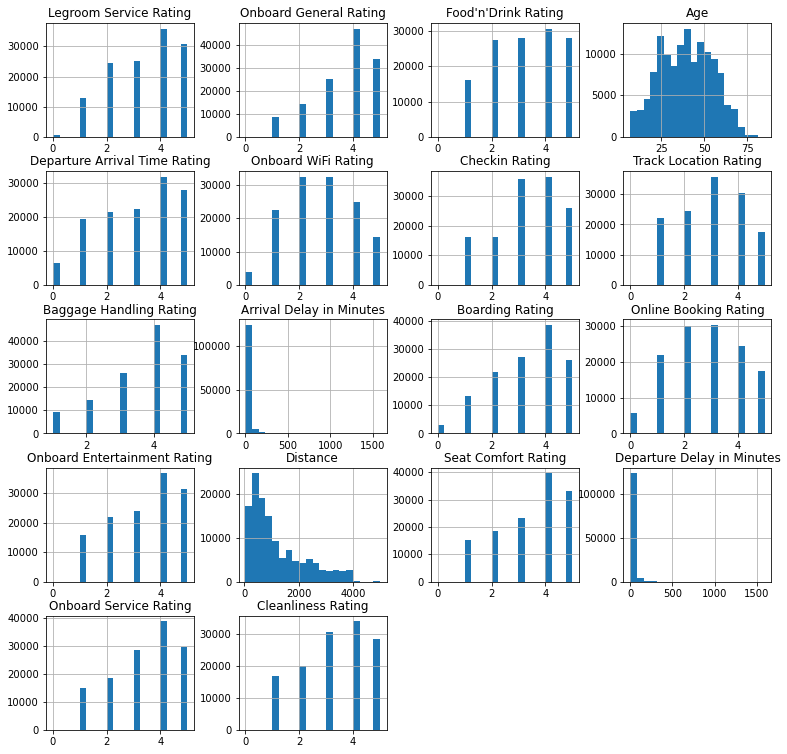

In [14]:
numerical_data.hist(figsize=(13,13),bins=20)
plt.show()

**Observations from Numerical Features Distributions**

The initial EDA revealed that customer ratings for onboard services generally skewed high, indicating overall customer satisfaction with the ThomasTrain company's services. In contrast, features like 'Food'n'Drink Rating', 'Seat Comfort Rating', and 'Legroom Service Rating' displayed more diverse customer opinions.


Both 'Departure Delay in Minutes' and 'Arrival Delay in Minutes' showed a preponderance of short delays, with occasional longer delays that could significantly impact customer satisfaction.

The distribution of 'Distance' suggested that most travels were short, but with enough long-distance trips to merit separate consideration for their impact on satisfaction levels.

### 2.2.2) Categorical variables

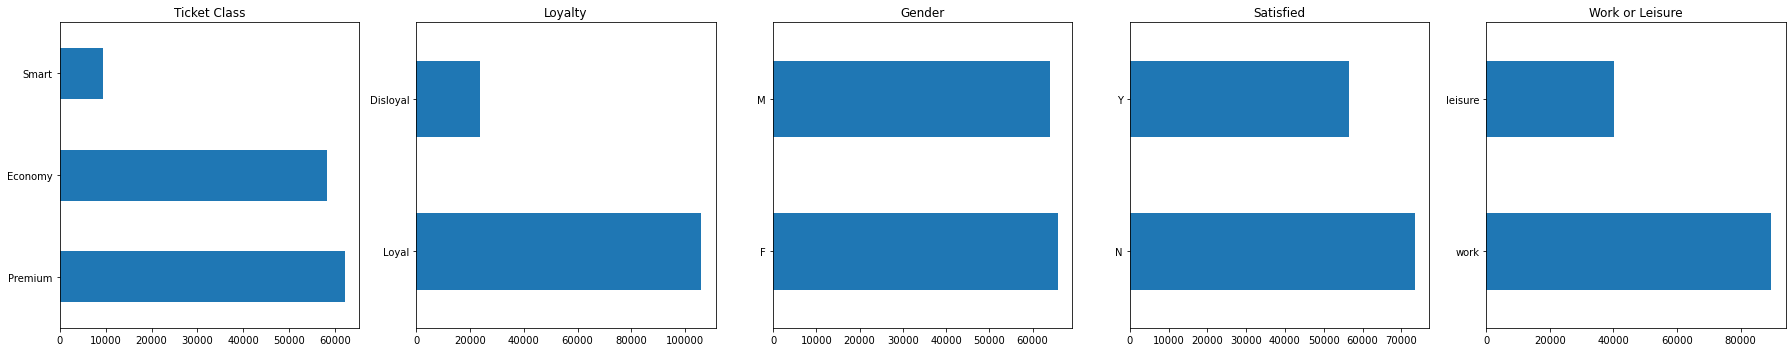

In [15]:
# Determine the number of categorical features
num_features = len(categorical_features)

# Create a figure with subplots in one row
fig, axes = plt.subplots(1, num_features, figsize=(num_features * 5, 5))  # Adjust figure size as needed

# Loop through each categorical feature and create a horizontal bar plot
for i, col in enumerate(categorical_features):
    categorical_data[col].value_counts().plot(kind='barh', ax=axes[i], title=col)

plt.tight_layout()
plt.show()

**Observations from Categorical Features Distributions**

- Regarding ticket classes, the 'Premium' (62160/129880 = 47%) and 'Economy' are the most choosen, while 'smart' represents a much smaller group;
- Regarding Loyalty people who are "Loyal" are 106100/129880 = 80% of the total
- Regarding Gender they are almost equals
- Regarding Satisfaction, people that are not satisfied represent the 73452/129880 = 56% of the total
- Regarding the reason of the travel, the majority is for work (89693/129880 = 69% of the total)

## 2.3) Correlation analysis

### 2.3.1) Correlation between numerical variables

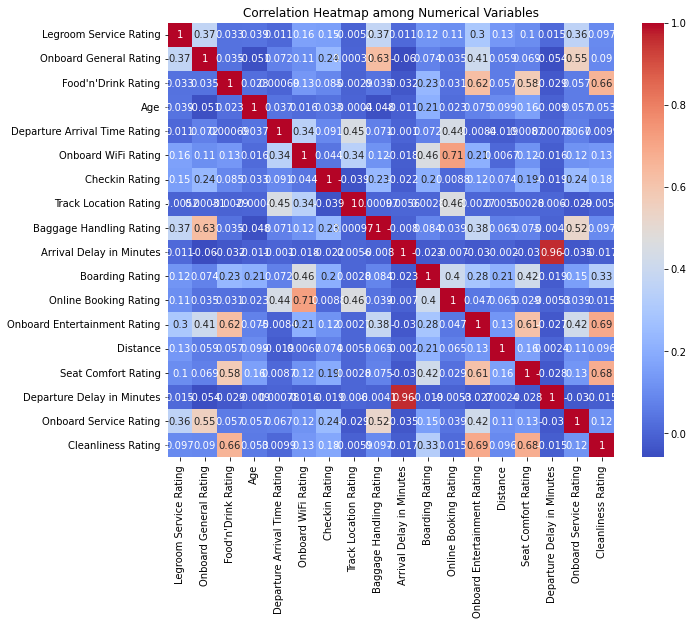

In [16]:
# Correlation among numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(df_trains_filtered[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap among Numerical Variables')
plt.show()


### 2.3.2) Correlation analysis between numerical variables & the target

In [17]:
# Convert 'Satisfied' to a numerical format for correlation analysis
df_trains_filtered['Satisfied_Num'] = df_trains_filtered['Satisfied'].apply(lambda x: 1 if x == 'Y' else 0)

for col in numerical_features:
    corr, _ = pointbiserialr(df_trains_filtered[col], df_trains_filtered['Satisfied_Num'])
    print(f'Correlation between {col} and Satisfied: {corr}')

Correlation between Legroom Service Rating and Satisfied: 0.3124238194944644
Correlation between Onboard General Rating and Satisfied: 0.244917835745692
Correlation between Food'n'Drink Rating and Satisfied: 0.21134020762506026
Correlation between Age and Satisfied: 0.13409123867754663
Correlation between Departure Arrival Time Rating and Satisfied: -0.05426971049373698
Correlation between Onboard WiFi Rating and Satisfied: 0.28346023010122745
Correlation between Checkin Rating and Satisfied: 0.23725236030898372
Correlation between Track Location Rating and Satisfied: -0.002793274652470942
Correlation between Baggage Handling Rating and Satisfied: 0.24867991877512483
Correlation between Arrival Delay in Minutes and Satisfied: -0.05814493658832044
Correlation between Boarding Rating and Satisfied: 0.5017494207376278
Correlation between Online Booking Rating and Satisfied: 0.1688771390528441
Correlation between Onboard Entertainment Rating and Satisfied: 0.3982336506118982
Correlation be

Among numerical variables, "Boarding Rating" and "Onboard Entertainment Rating" show the strongest positive correlations with satisfaction, while delays (both arrival and departure) have negative and poor correlation with satisfaction.

### 2.3.3) Correlation analysis: categorical variables & the target

In [18]:
# Function to calculate Cramér's V for categorical variables
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k-1, r-1))


# Correlation among categorical variables and with the target variable
for col in categorical_features:
    if col != 'Satisfied':
        result = cramers_v(df_trains_filtered[col], df_trains_filtered['Satisfied'])
        print(f"Correlation between {col} and Satisfied: {result}")

Correlation between Ticket Class and Satisfied: 0.5033470652376267
Correlation between Loyalty and Satisfied: 0.18599710903940497
Correlation between Gender and Satisfied: 0.01122058165604724
Correlation between Work or Leisure and Satisfied: 0.44984445343575097


Among categorical variables, "Ticket Class" and "Work or Leisure" have stronger associations with satisfaction, while 'Gender' is poorly correlated.

## 3) Feature Selection

Select features that are most likely to predict customer satisfaction effectively

In [19]:
# Calculating correlations and filtering based on the threshold
correlation_threshold = 0.15
selected_features = []

# Feature Selection for Numerical Features
numerical_cols = df_trains_filtered.select_dtypes(include=['int64', 'float64']).columns
selected_numerical = [col for col in numerical_cols if abs(pointbiserialr(df_trains_filtered[col], df_trains_filtered['Satisfied_Num']).correlation) > correlation_threshold]

# Feature Selection for Categorical Features
categorical_cols = df_trains_filtered.select_dtypes(include=['object']).columns
selected_categorical = [col for col in categorical_features if col != 'Satisfied' and
                        cramers_v(df_trains_filtered[col], df_trains_filtered['Satisfied']) > correlation_threshold]

# Combine selected features
selected_features = selected_numerical + selected_categorical

final_df_trains = df_trains_filtered[selected_features]


Since there are many features that are not really correlated with the target variable, we can drop them, since they are not relevant to train the model. In particular, we will drop all the features that have a correlation with the target variable in absolute value smaller than 0.15

A surprising result is the lower correlation of the Arrival and Departure Delay in Minutes features. This is maybe due to the fact that the presence of few outliers does not highly affect the correlation.


## 4) Preparing Data for Modeling

### 4.1) Encoding Categorical Variables

Convert categorical variables to a format suitable for modeling

In [20]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Select categorical variables
new_categorical_cols = final_df_trains.select_dtypes(include=['object']).columns

# Initialize an empty DataFrame for the encoded columns
encoded_df = pd.DataFrame()

# Loop through each categorical column
for col in new_categorical_cols:
    if final_df_trains[col].nunique() >= 3:
        # Apply Label Encoding for variables with 3 or more unique values
        le = LabelEncoder()
        encoded_df[col+'_encoded'] = le.fit_transform(final_df_trains[col])
    else:
        # Apply One-Hot Encoding for binary variables
        encoder = OneHotEncoder(sparse_output=False, drop='first')
        encoded_col = encoder.fit_transform(final_df_trains[[col]])
        encoded_col_df = pd.DataFrame(encoded_col, columns=[col+'_encoded'])
        encoded_df = pd.concat([encoded_df, encoded_col_df], axis=1)

# Concatenate encoded columns with the original DataFrame and drop original categorical columns
df_trains_encoded = pd.concat([final_df_trains, encoded_df], axis=1).drop(new_categorical_cols, axis=1)




If a categorical column has three or more unique values, Label Encoding is applied, which involves assigning a unique integer to each category.

If a categorical column has only two unique values (binary), One-Hot Encoding is applied, which creates a new binary column for each category.

The parameter sparse_output=False is used to ensure that the output is a dense array.
The drop='first' option drops the first level to avoid multicollinearity issues, which is a common practice when dealing with binary variables.



### 4.2) Removing Outliers

In [21]:
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25) #first quantile
    Q3 = df[ft].quantile(0.75) #second quantile
    IQR = Q3 - Q1 #interquantile range

    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound)] # stores the indexes of the outliers, hence all values either < lower bound, or > upper bound

    return ls

def remove(df, ls):

    #process the list of indexes, since it may be not sorted or not unique
    ls = sorted(set(ls))

    df = df.drop(ls) # dropping rows containing outliers

    return df

index_list = []

# Filter all numeric columns
numeric_columns = df_trains_encoded.select_dtypes(include=[np.number]).columns

# Extract outliers
for column in numeric_columns:
    index_list.extend(outliers(df_trains_encoded, column))

# calling the function to remove the outliers
data_df_cleaned = remove(df_trains_encoded, index_list)

#checking the shape of the new dataframe
print(f'Dataframe before outliers remotion: {df_trains_encoded.shape}')
print(f'Dataframe after outliers remotion: {data_df_cleaned.shape}')

Dataframe before outliers remotion: (129880, 17)
Dataframe after outliers remotion: (90725, 17)


We defined two functions, **outliers** and **remove**.

- The outliers function returns a list of indexes (index_list) where outliers are found across all these columns;

- The remove function, passes the dataframe and the compiled index_list to remove all identified outliers.

### 4.3) Data Splitting

Split the dataset into training and testing sets

In [22]:
from sklearn.model_selection import train_test_split

# Assuming 'Satisfied_Num' is your target variable
X = data_df_cleaned.drop('Satisfied_Num', axis=1)
y = data_df_cleaned['Satisfied_Num']

# Split the data - 75% train, 25% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)



X_train shape: (68043, 16)
X_test shape: (22682, 16)


### 4.4) Distribution of the target variable in the different sets

In [23]:
# Calculate the distribution of y in the original dataset
unique_vals, original_counts = np.unique(y, return_counts=True)

# Calculate the distribution of y_train in the training set
train_unique_vals, train_counts = np.unique(y_train, return_counts=True)

# Calculate the distribution of y_test in the test set
test_unique_vals, test_counts = np.unique(y_test, return_counts=True)

# Print the distributions
print("Distribution of y (Original Dataset):")
print(f"Class {unique_vals[0]}: {original_counts[0]} samples")
print(f"Class {unique_vals[1]}: {original_counts[1]} samples")
print(f"Ratio: {original_counts[1] / (original_counts[0] + original_counts[1])}")

print("\nDistribution of y_train (Training Set):")
print(f"Class {train_unique_vals[0]}: {train_counts[0]} samples")
print(f"Class {train_unique_vals[1]}: {train_counts[1]} samples")
print(f"Ratio: {train_counts[1] / (train_counts[0] + train_counts[1])}")

print("\nDistribution of y_test (Test Set):")
print(f"Class {test_unique_vals[0]}: {test_counts[0]} samples")
print(f"Class {test_unique_vals[1]}: {test_counts[1]} samples")
print(f"Ratio: {test_counts[1] / (test_counts[0] + test_counts[1])}")

Distribution of y (Original Dataset):
Class 0: 45629 samples
Class 1: 45096 samples
Ratio: 0.49706255166712593

Distribution of y_train (Training Set):
Class 0: 34228 samples
Class 1: 33815 samples
Ratio: 0.49696515438766664

Distribution of y_test (Test Set):
Class 0: 11401 samples
Class 1: 11281 samples
Ratio: 0.4973547306234018


The ratio between the two classes is the same in both the training and the test set. This is a good thing, since it means that the model will be trained on a balanced dataset and will be able to generalize well. In addittion, we do not have to deal with stratification (splitting the dataset mantaining a balanced ratio between the two classes).

### 4.5) Feature Scaling: Fit and Transform

In [24]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_X.fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

We applied *fit_transform* on the training set and  *transform* on the test set in order to standardize the data. We have to fit and transform the training set and only transform the test set, because the scaling parameters (mean and standard deviation in the case of StandardScaler) should be calculated based on the training set to prevent data leakage.

Data leakage is when information from outside the training dataset is used to create the model. This can lead to the model learning from the test set, which will cause it to perform poorly on unseen data.

### 4.6) Creating a Validation Set

The main reason for creating a separate validation set is to have an unbiased evaluation of a model fit on the training dataset. It helps in tuning the model's hyperparameters and assessing its generalization to new data, without touching the test set until the final evaluation.

In [25]:
from sklearn.model_selection import train_test_split

X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


## 5) Model Building

### Model selection

Since our target variable 'Satisfied' is categorical and  we have to predict if the curstomers are satisfied or not of the service, we are dealing with a classification problem. Furthermore, since the answer to our problem can be 'Yes' (satisfied) or 'No' (not satisfied), the outcome is binary.

To take it forward, we are going to analyze these models:

- ***Logistic regression***:
- ***Classification Trees***:
- ***Random Forest***:

### 5.1) Testing Different Models

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# Initialize models with default hyperparameters
log_reg = LogisticRegression()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()


# Train each model and evaluate on both the training set and validation set
for model in [log_reg, dt_clf, rf_clf]:
    model.fit(X_train_new, y_train_new)

    # Calculate accuracy on the training set
    train_score = model.score(X_train_new, y_train_new)

    # Calculate accuracy on the validation set
    val_score = model.score(X_val, y_val)

    # Print accuracy for both training and validation sets
    print(f'{model.__class__.__name__} training accuracy: {train_score}')
    print(f'{model.__class__.__name__} validation accuracy: {val_score}')
    print('\n')



LogisticRegression training accuracy: 0.8883053770183414
LogisticRegression validation accuracy: 0.8844277232379049


DecisionTreeClassifier training accuracy: 1.0
DecisionTreeClassifier validation accuracy: 0.9526188936570454


RandomForestClassifier training accuracy: 1.0
RandomForestClassifier validation accuracy: 0.9653165598730233




The Logistic Regression model shows the smallest gap between training and validation accuracies, indicating good generalization. The Decision Tree and Random Forest models, despite a 100% training accuracy, also generalize well to new data.

The Tree models show a perfect fit on the training data but a lower validation accuracy, suggesting potential overfitting. This is a typical behavior of decision trees, especially with complex datasets or without proper pruning.


## 5.2) Hyperparameter Tuning Using Cross-Validation

We decided to approach cross-validation, using Randomized Search followed by Grid Search for hyperparameter tuning. Such strategic approach balances the need for exploring a wide range of options (Randomized Search) with the need for finding the optimal combination in a focused range (Grid Search), leading to a more efficient and effective model tuning.








### 5.2.1) Randomized and Grid Search for Logistic Regression

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Parameter distribution
c_range = np.arange(0.01, 10, 0.01)
param_distr_log_reg = {'C': c_range, 'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky'], 'penalty': ['l2']}

# Randomized search with cross-validation
random_log_reg = RandomizedSearchCV(LogisticRegression(), param_distr_log_reg, n_iter=10, cv=5, random_state=42, n_jobs=-1, return_train_score=True)
random_log_reg.fit(X_train, y_train)

# Extract the mean and standard deviation of training and validation scores
mean_train_score = random_log_reg.cv_results_['mean_train_score'][random_log_reg.best_index_]
std_train_score = random_log_reg.cv_results_['std_train_score'][random_log_reg.best_index_]
mean_test_score = random_log_reg.cv_results_['mean_test_score'][random_log_reg.best_index_]
std_test_score = random_log_reg.cv_results_['std_test_score'][random_log_reg.best_index_]

# Print the results
print("Best parameters for Logistic Regression:", random_log_reg.best_params_)
print("Best training score for Logistic Regression:", mean_train_score)
print("Standard deviation in training score:", std_train_score)
print("Best cross-validation score for Logistic Regression:", mean_test_score)
print("Standard deviation in cross-validation score:", std_test_score)

Best parameters for Logistic Regression: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 7.94}
Best training score for Logistic Regression: 0.8872514404344086
Standard deviation in training score: 0.00109674259718711
Best cross-validation score for Logistic Regression: 0.8873505906909047
Standard deviation in cross-validation score: 0.0034503821326557662


To perform the grid search, we need to define a grid of hyperparameters. We will use the following grid:
- penalty: the one suggested by the randomized search
- C: we consider 10 values around the one suggested by the randomized search
- solver: the one suggested by the randomized search

In [28]:
from sklearn.model_selection import GridSearchCV

c_value = random_log_reg.best_params_['C']
solver_value = random_log_reg.best_params_['solver']
penalty_value = random_log_reg.best_params_['penalty']
c_values_range = np.arange(c_value-0.1, c_value+0.1, 0.01)

# Parameter distribution
param_distr_log_reg = {'C': c_values_range, 'solver': [solver_value], 'penalty': [penalty_value]}

# Grid search with cross-validation
grid_log_reg = GridSearchCV(LogisticRegression(), param_distr_log_reg, cv=5, n_jobs=-1, return_train_score=True)
grid_log_reg.fit(X_train, y_train)

# Extract the mean and standard deviation of training and validation scores
mean_train_score = grid_log_reg.cv_results_['mean_train_score'][grid_log_reg.best_index_]
std_train_score = grid_log_reg.cv_results_['std_train_score'][grid_log_reg.best_index_]
mean_test_score = grid_log_reg.cv_results_['mean_test_score'][grid_log_reg.best_index_]
std_test_score = grid_log_reg.cv_results_['std_test_score'][grid_log_reg.best_index_]

# Print the results
print('Best parameters for Logistic Regression:', grid_log_reg.best_params_)
print('Best training score for Logistic Regression:', mean_train_score)
print('Standard deviation in training score:', std_train_score)
print('Best cross-validation score for Logistic Regression:', mean_test_score)
print('Standard deviation in cross-validation score:', std_test_score)

Best parameters for Logistic Regression: {'C': 7.840000000000001, 'penalty': 'l2', 'solver': 'newton-cg'}
Best training score for Logistic Regression: 0.8872514404344086
Standard deviation in training score: 0.00109674259718711
Best cross-validation score for Logistic Regression: 0.8873505906909047
Standard deviation in cross-validation score: 0.0034503821326557662


The Logistic Regression model, with the specified combination of hyperparameters, shows strong and consistent performance on the training data. The close alignment of training and cross-validation scores indicates good generalizability of the model.

### 5.2.2) Randomized and Grid Search for Decision Tree

In [29]:
from scipy.stats import randint

# Parameter distribution for Decision Tree
param_distr_dt = {'max_depth': randint(1, 30), 'min_samples_split': randint(2, 20), 'min_samples_leaf': randint(1, 20)}

# Randomized search with cross-validation
random_dt = RandomizedSearchCV(DecisionTreeClassifier(), param_distr_dt, n_iter=10, cv=5, random_state=42, n_jobs=-1, return_train_score=True)
random_dt.fit(X_train, y_train)

# Extract the mean and standard deviation of training and validation scores
mean_train_score_dt = random_dt.cv_results_['mean_train_score'][random_dt.best_index_]
std_train_score_dt = random_dt.cv_results_['std_train_score'][random_dt.best_index_]
mean_test_score_dt = random_dt.cv_results_['mean_test_score'][random_dt.best_index_]
std_test_score_dt = random_dt.cv_results_['std_test_score'][random_dt.best_index_]

# Print the results
print("Best parameters for Decision Tree:", random_dt.best_params_)
print("Best training score for Decision Tree:", mean_train_score_dt)
print("Standard deviation in training score:", std_train_score_dt)
print("Best cross-validation score for Decision Tree:", mean_test_score_dt)
print("Standard deviation in cross-validation score:", std_test_score_dt)


Best parameters for Decision Tree: {'max_depth': 11, 'min_samples_leaf': 4, 'min_samples_split': 9}
Best training score for Decision Tree: 0.9624502171918895
Standard deviation in training score: 0.0004007947490205823
Best cross-validation score for Decision Tree: 0.9572916989306062
Standard deviation in cross-validation score: 0.0021679811477703015


In [30]:
from sklearn.model_selection import GridSearchCV

# Extracting best parameters from the randomized search
max_depth_value = random_dt.best_params_['max_depth']
min_samples_split_value = random_dt.best_params_['min_samples_split']
min_samples_leaf_value = random_dt.best_params_['min_samples_leaf']

# Defining the parameter range for the grid search
max_depth_range = np.arange(max(1, max_depth_value - 3), max_depth_value + 4)
min_samples_split_range = np.arange(max(2, min_samples_split_value - 2), min_samples_split_value + 3)
min_samples_leaf_range = np.arange(max(1, min_samples_leaf_value - 2), min_samples_leaf_value + 3)

# Parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': max_depth_range,
    'min_samples_split': min_samples_split_range,
    'min_samples_leaf': min_samples_leaf_range
}

# Grid search with cross-validation
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5, n_jobs=-1, return_train_score=True)
grid_dt.fit(X_train, y_train)

# Extract the mean and standard deviation of training and validation scores
mean_train_score_dt = grid_dt.cv_results_['mean_train_score'][grid_dt.best_index_]
std_train_score_dt = grid_dt.cv_results_['std_train_score'][grid_dt.best_index_]
mean_test_score_dt = grid_dt.cv_results_['mean_test_score'][grid_dt.best_index_]
std_test_score_dt = grid_dt.cv_results_['std_test_score'][grid_dt.best_index_]

# Print the results
print("Best parameters for Decision Tree:", grid_dt.best_params_)
print("Best training score for Decision Tree:", mean_train_score_dt)
print("Standard deviation in training score:", std_train_score_dt)
print("Best cross-validation score for Decision Tree:", mean_test_score_dt)
print("Standard deviation in cross-validation score:", std_test_score_dt)


Best parameters for Decision Tree: {'max_depth': 13, 'min_samples_leaf': 2, 'min_samples_split': 11}
Best training score for Decision Tree: 0.966870218011365
Standard deviation in training score: 0.000548274841277597
Best cross-validation score for Decision Tree: 0.9603485956940776
Standard deviation in cross-validation score: 0.001715761284956255


The Decision Tree model shows excellent performance on both training and validation datasets after hyperparameter tuning.
The selected hyperparameters have effectively controlled overfitting, as evidenced by the high and closely matched training and cross-validation scores.

### 5.2.3) Randomized and Grid Search for Random Forest

In [31]:
from scipy.stats import randint

# Parameter distribution
param_distr_rf = { 'n_estimators': randint(100, 200), 'max_features': ['sqrt', 'log2'], 'max_depth': randint(10, 20) }


# Randomized search with cross-validation
random_rf = RandomizedSearchCV(RandomForestClassifier(), param_distr_rf, n_iter=5, cv=3, random_state=42, n_jobs=-1, return_train_score=True)
random_rf.fit(X_train, y_train)

# Extract the mean and standard deviation of training and validation scores
mean_train_score_rf = random_rf.cv_results_['mean_train_score'][random_rf.best_index_]
std_train_score_rf = random_rf.cv_results_['std_train_score'][random_rf.best_index_]
mean_test_score_rf = random_rf.cv_results_['mean_test_score'][random_rf.best_index_]
std_test_score_rf = random_rf.cv_results_['std_test_score'][random_rf.best_index_]

# Print the results
print("Best parameters for RandomForest:", random_rf.best_params_)
print("Best training score for RandomForest:", mean_train_score_rf)
print("Standard deviation in training score:", std_train_score_rf)
print("Best cross-validation score for RandomForest:", mean_test_score_rf)
print("Standard deviation in cross-validation score:", std_test_score_rf)


Best parameters for RandomForest: {'max_depth': 17, 'max_features': 'sqrt', 'n_estimators': 199}
Best training score for RandomForest: 0.9872580574048763
Standard deviation in training score: 0.00040529024978727804
Best cross-validation score for RandomForest: 0.9666681363255588
Standard deviation in cross-validation score: 0.000636889869054013


In [32]:
from sklearn.model_selection import GridSearchCV


# Extracting best parameters from the randomized search
n_estimators_value = random_rf.best_params_['n_estimators']
max_features_value = random_rf.best_params_['max_features']
max_depth_value = random_rf.best_params_['max_depth']

# Defining the parameter range for the grid search
n_estimators_range = np.arange(n_estimators_value - 30, n_estimators_value + 31, 20)
max_depth_range = np.arange(max(10, max_depth_value - 3), max_depth_value + 4)

# Parameter grid for Random Forest
param_grid_rf = {'n_estimators': n_estimators_range, 'max_features': [max_features_value], 'max_depth': max_depth_range}

# Grid search with cross-validation
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=3, n_jobs=-1, return_train_score=True)
grid_rf.fit(X_train, y_train)


# Extract the mean and standard deviation of training and validation scores
mean_train_score_rf = grid_rf.cv_results_['mean_train_score'][grid_rf.best_index_]
std_train_score_rf = grid_rf.cv_results_['std_train_score'][grid_rf.best_index_]
mean_test_score_rf = grid_rf.cv_results_['mean_test_score'][grid_rf.best_index_]
std_test_score_rf = grid_rf.cv_results_['std_test_score'][grid_rf.best_index_]

# Print the results
print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best training score for Random Forest:", mean_train_score_rf)
print("Standard deviation in training score:", std_train_score_rf)
print("Best cross-validation score for Random Forest:", mean_test_score_rf)
print("Standard deviation in cross-validation score:", std_test_score_rf)

Best parameters for Random Forest: {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 209}
Best training score for Random Forest: 0.9945916552768103
Standard deviation in training score: 0.00015726036887730606
Best cross-validation score for Random Forest: 0.9675499316608617
Standard deviation in cross-validation score: 0.0004364664228477959


 The training accuracy is slightly reduced compared to the perfect score of 100% obtained before cross-validation. This suggests the model is slightly less prone to overfitting with the optimal parameters. The low standard deviations in both training and validation scores signify stable performance across different subsets of the data.

## 6) Plotting Learning Curves

### 6.1) Learning Curves: Logistic Regression

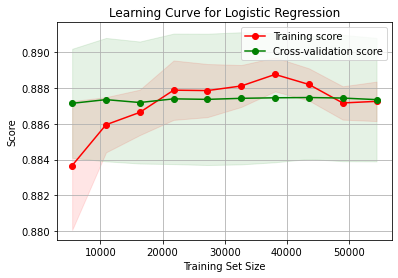

In [33]:
from sklearn.model_selection import learning_curve


# Best parameters from grid search
best_params = grid_log_reg.best_params_

# Create logistic regression model with best parameters
model = LogisticRegression(C=best_params['C'], solver=best_params['solver'], penalty=best_params['penalty'])

# Define training sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Compute the learning curves
train_sizes, train_scores, validation_scores = learning_curve(
    model, X_train, y_train, train_sizes=train_sizes, cv=5, n_jobs=-1)

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for validation set scores
validation_mean = np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Plot the learning curve
plt.figure()
plt.title('Learning Curve for Logistic Regression')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.grid()

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()



The training and cross-validation scores converge with increasing training set size, which implies good generalization. However, the scores are lower than the other two models, suggesting higher bias. The model may benefit from additional features or more complex model architecture.

### 6.2) Learning Curves: Decision Tree

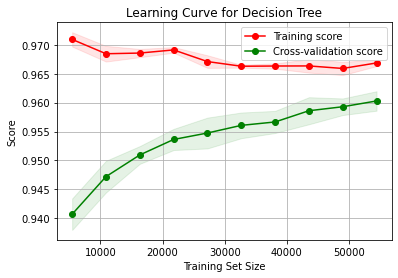

In [34]:
from sklearn.model_selection import learning_curve

# Best parameters from grid search for Decision Tree
best_params_dt = grid_dt.best_params_

# Create Decision Tree model with best parameters
model_dt = DecisionTreeClassifier(max_depth=best_params_dt['max_depth'],
                                  min_samples_split=best_params_dt['min_samples_split'],
                                  min_samples_leaf=best_params_dt['min_samples_leaf'])

# Define training sizes
train_sizes_dt = np.linspace(0.1, 1.0, 10)

# Compute the learning curves
train_sizes_dt, train_scores_dt, validation_scores_dt = learning_curve(
    model_dt, X_train, y_train, train_sizes=train_sizes_dt, cv=5, n_jobs=-1)

# Calculate mean and standard deviation for training set scores
train_mean_dt = np.mean(train_scores_dt, axis=1)
train_std_dt = np.std(train_scores_dt, axis=1)

# Calculate mean and standard deviation for validation set scores
validation_mean_dt = np.mean(validation_scores_dt, axis=1)
validation_std_dt = np.std(validation_scores_dt, axis=1)

# Plot the learning curve
plt.figure()
plt.title('Learning Curve for Decision Tree')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.grid()

plt.fill_between(train_sizes_dt, train_mean_dt - train_std_dt, train_mean_dt + train_std_dt, alpha=0.1, color="r")
plt.fill_between(train_sizes_dt, validation_mean_dt - validation_std_dt, validation_mean_dt + validation_std_dt, alpha=0.1, color="g")
plt.plot(train_sizes_dt, train_mean_dt, 'o-', color="r", label="Training score")
plt.plot(train_sizes_dt, validation_mean_dt, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()


The training score starts high and remains relatively stable, suggesting low bias, but higher variance than the Random Forest as indicated by the increasing trend of the cross-validation score.

### 6.3) Learning Curves: Random Forest

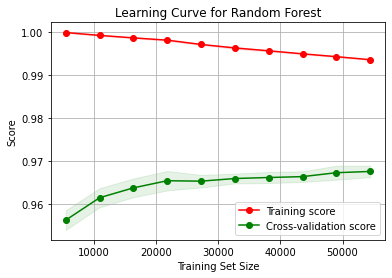

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier

# Best parameters from grid search for Random Forest
best_params_rf = grid_rf.best_params_

# Create Random Forest model with best parameters
model_rf = RandomForestClassifier(n_estimators=best_params_rf['n_estimators'],
                                  max_features=best_params_rf['max_features'],
                                  max_depth=best_params_rf['max_depth'])

# Define training sizes
train_sizes_rf = np.linspace(0.1, 1.0, 10)

# Compute the learning curves
train_sizes_rf, train_scores_rf, validation_scores_rf = learning_curve(
    model_rf, X_train, y_train, train_sizes=train_sizes_rf, cv=5, n_jobs=-1)

# Calculate mean and standard deviation for training set scores
train_mean_rf = np.mean(train_scores_rf, axis=1)
train_std_rf = np.std(train_scores_rf, axis=1)

# Calculate mean and standard deviation for validation set scores
validation_mean_rf = np.mean(validation_scores_rf, axis=1)
validation_std_rf = np.std(validation_scores_rf, axis=1)

# Plot the learning curve
plt.figure()
plt.title('Learning Curve for Random Forest')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.grid()

plt.fill_between(train_sizes_rf, train_mean_rf - train_std_rf, train_mean_rf + train_std_rf, alpha=0.1, color="r")
plt.fill_between(train_sizes_rf, validation_mean_rf - validation_std_rf, validation_mean_rf + validation_std_rf, alpha=0.1, color="g")
plt.plot(train_sizes_rf, train_mean_rf, 'o-', color="r", label="Training score")
plt.plot(train_sizes_rf, validation_mean_rf, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()


The learning curve shows a high training score that remains stable with increasing training set size, indicating low bias. The cross-validation score increases with more data, suggesting the model benefits from more data and has moderate variance

## 7) Models Evaluation

### 7.1) Classification metrics

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, RocCurveDisplay

# Instantiate the models with the best parameters
log_reg_model = LogisticRegression(**grid_log_reg.best_params_)
decision_tree_model = DecisionTreeClassifier(**grid_dt.best_params_)
random_forest_model = RandomForestClassifier(**grid_rf.best_params_)

# Fit the models on the training data
log_reg_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
log_reg_pred = log_reg_model.predict(X_test)
decision_tree_pred = decision_tree_model.predict(X_test)
random_forest_pred = random_forest_model.predict(X_test)

# Detailed metrics
print("Logistic Regression Classification Report:\n", classification_report(y_test, log_reg_pred))
print("Decision Tree Classification Report:\n", classification_report(y_test, decision_tree_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, random_forest_pred))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.89     11401
           1       0.89      0.87      0.88     11281

    accuracy                           0.88     22682
   macro avg       0.88      0.88      0.88     22682
weighted avg       0.88      0.88      0.88     22682

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96     11401
           1       0.98      0.94      0.96     11281

    accuracy                           0.96     22682
   macro avg       0.96      0.96      0.96     22682
weighted avg       0.96      0.96      0.96     22682

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     11401
           1       0.98      0.95      0.97     11281

    accuracy                           0.97     22682
   macro

- Logistic Regression shows balanced performance on both classes with precision, recall, and f1-score all around 0.88.
Accuracy across the whole dataset is 0.88, suggesting a good fit but not as high as the other models.

- Decision Tree exhibits high precision (0.94 for class 0 and 0.98 for class 1) and recall (0.98 for class 0 and 0.94 for class 1), leading to a high f1-score of 0.96 for both classes.
The overall accuracy is very high at 0.96, indicating that the model performs very well on this dataset.

- Random Forest achieves slightly higher precision and recall than the Decision Tree, with both metrics close to 0.95 or above for each class, resulting in an f1-score of 0.97 for both classes.
The overall accuracy is the highest at 0.97, suggesting that Random Forest is the best performing model among the three on this dataset.
General Interpretation:

The Random Forest model is the most effective, with the highest accuracy and f1-scores, indicating a very good balance between precision and recall. The Decision Tree also performs well, with very similar metrics to Random Forest, but slightly lower.
Logistic Regression, while still performing adequately, lags behind the tree-based models in terms of all reported metrics on this dataset.

### 7.2) Confusion Matrices

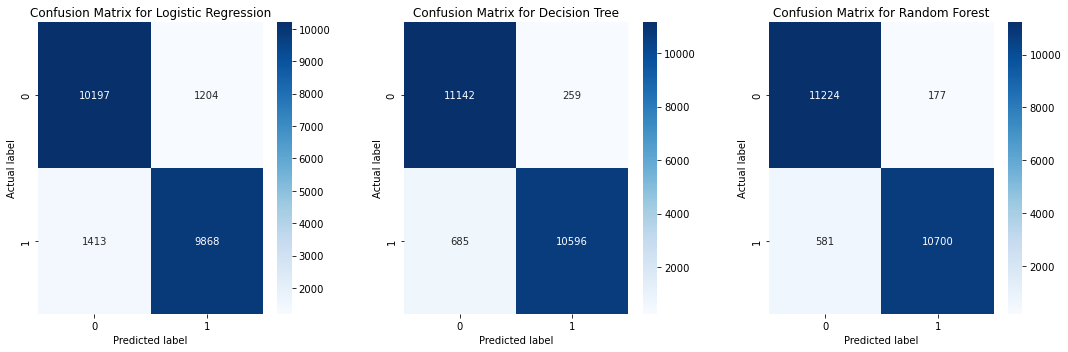

In [37]:
def plot_confusion_matrix(y_true, y_preds, model_names):
    fig, axes = plt.subplots(nrows=1, ncols=len(y_preds), figsize=(15, 5))

    for ax, y_pred, model_name in zip(axes, y_preds, model_names):
        cm = confusion_matrix(y_true, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
        ax.set_title(f'Confusion Matrix for {model_name}')
        ax.set_ylabel('Actual label')
        ax.set_xlabel('Predicted label')

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.3)
    plt.show()

# Create a list of predictions and model names
predictions = [log_reg_pred, decision_tree_pred, random_forest_pred]
model_names = ["Logistic Regression", "Decision Tree", "Random Forest"]

# Call the function with the test labels, predictions, and model names
plot_confusion_matrix(y_test, predictions, model_names)

- Logistic Regression:The model is reasonably balanced in its classification ability, with a slight tendency to misclassify class 0 cases as class 1.

- Decision Tree: This model shows a high number of correct predictions with fewer false positives and negatives, indicating a high-performing model with better sensitivity and precision than the Logistic Regression model.

- Random Forest:has the highest number of correct predictions and the lowest number of errors, suggesting it is the most accurate and well-balanced model among the three, with excellent sensitivity and precision.


The Random Forest model outperforms the other two models in every aspect of classification correctness.
The Decision Tree model also performs well, but with slightly more false negatives than the Random Forest.
The Logistic Regression model has the highest number of false positives, which could indicate a lower threshold for predicting class 1, and thus a lower precision compared to the tree-based models.

### 7.3) ROC Curves

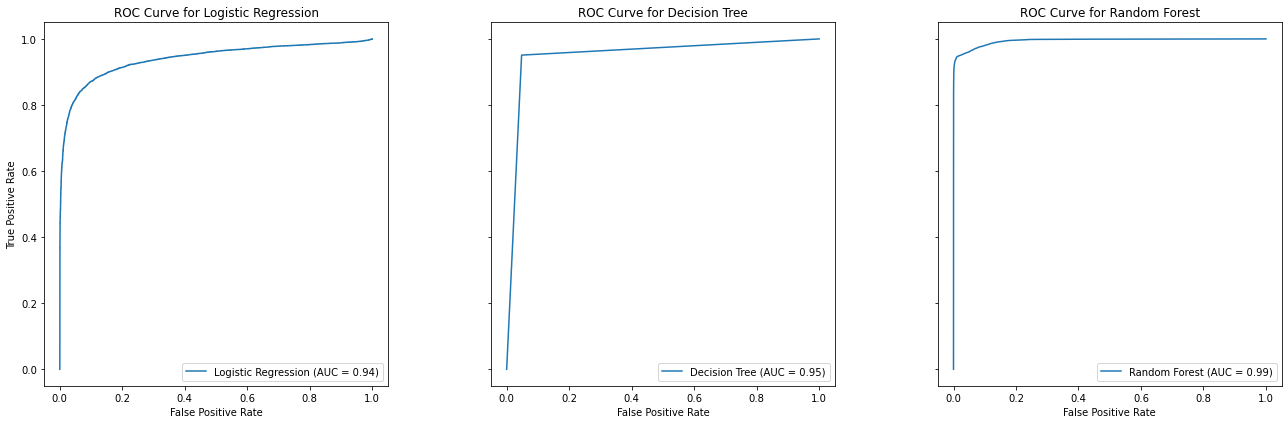

In [38]:
def plot_roc_curves_and_get_auc(models, X_test, y_test, model_names):
    fig, axes = plt.subplots(nrows=1, ncols=len(models), figsize=(18, 6))
    auc_scores = {}

    for ax, model, model_name in zip(axes, models, model_names):
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        auc_scores[model_name] = roc_auc  # Store the AUC score

        RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=model_name).plot(ax=ax)
        ax.set_title(f'ROC Curve for {model_name}')
        ax.label_outer()

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.3)  # Adjust the width of the space between subplots
    plt.show()

    return auc_scores

# Create a list of models and model names
models = [log_reg, dt_clf, rf_clf]
model_names = ["Logistic Regression", "Decision Tree", "Random Forest"]

# Call the function with the test data and models, and get AUC scores
auc_scores = plot_roc_curves_and_get_auc(models, X_test, y_test, model_names)


The ROC (Receiver Operating Characteristic) curves provide a visual comparison of the models' true positive rates (sensitivity) against their false positive rates (1-specificity) at various threshold settings.

The AUC (Area Under the Curve) values can be interpreted as follows:

- Logistic Regression (AUC = 0.94): The model has very good discrimination ability, being able to differentiate between the positive and negative classes with a high degree of accuracy.

- Decision Tree (AUC = 0.95): This model has slightly better discrimination ability than logistic regression. The curve is closer to the top-left corner, indicating a higher true positive rate and a lower false positive rate.

- Random Forest (AUC = 0.99): The Random Forest model exhibits excellent discrimination ability, almost perfect, as indicated by the AUC being very close to 1. The ROC curve is very close to the top-left corner of the plot, which is ideal.


All three models perform well, with Random Forest having the best discrimination ability among them.
The high AUC values for all models indicate that they are good at ranking predictions rather than making hard classifications, and could be fine-tuned to achieve better performance at a specific threshold if needed.

### 7.4) Models Comparison

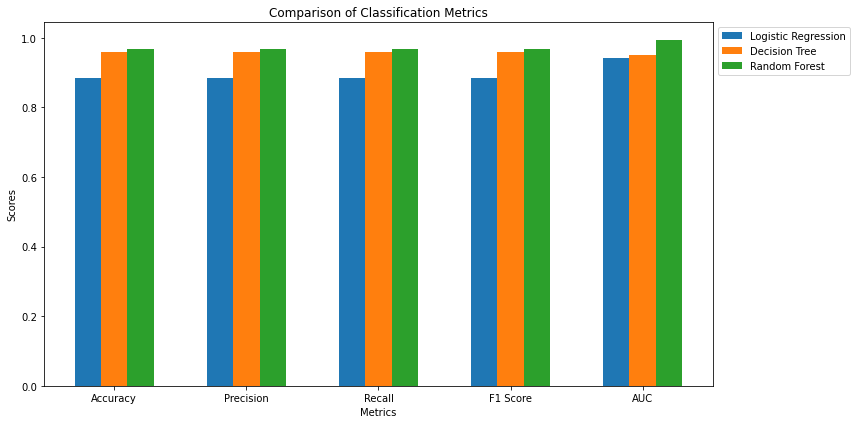

In [39]:
from sklearn.metrics import classification_report

# Detailed metrics as dictionaries
report_log_reg = classification_report(y_test, log_reg_pred, output_dict=True)
report_decision_tree = classification_report(y_test, decision_tree_pred, output_dict=True)
report_random_forest = classification_report(y_test, random_forest_pred, output_dict=True)

# Extracting accuracy, precision, recall, and f1-score for each model
accuracy_log_reg = report_log_reg['accuracy']
precision_log_reg = report_log_reg['weighted avg']['precision']
recall_log_reg = report_log_reg['weighted avg']['recall']
f1_log_reg = report_log_reg['weighted avg']['f1-score']

accuracy_dt = report_decision_tree['accuracy']
precision_dt = report_decision_tree['weighted avg']['precision']
recall_dt = report_decision_tree['weighted avg']['recall']
f1_dt = report_decision_tree['weighted avg']['f1-score']

accuracy_rf = report_random_forest['accuracy']
precision_rf = report_random_forest['weighted avg']['precision']
recall_rf = report_random_forest['weighted avg']['recall']
f1_rf = report_random_forest['weighted avg']['f1-score']

# For AUC, we have stored them previously during ROC curve plotting
auc_log_reg = auc_scores["Logistic Regression"]
auc_dt = auc_scores["Decision Tree"]
auc_rf = auc_scores["Random Forest"]


# Metrics for each model
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']
log_reg_values = [accuracy_log_reg, precision_log_reg, recall_log_reg, f1_log_reg, auc_log_reg]
decision_tree_values = [accuracy_dt, precision_dt, recall_dt, f1_dt, auc_dt]
random_forest_values = [accuracy_rf, precision_rf, recall_rf, f1_rf, auc_rf]

# Setting the positions and width for the bars
pos = np.arange(len(metrics))
bar_width = 0.2

# Plotting the bars
plt.figure(figsize=(12, 6))

plt.bar(pos, log_reg_values, bar_width, label='Logistic Regression')
plt.bar(pos + bar_width, decision_tree_values, bar_width, label='Decision Tree')
plt.bar(pos + bar_width * 2, random_forest_values, bar_width, label='Random Forest')

plt.xticks(pos + bar_width, metrics)
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of Classification Metrics')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


The bar chart we made compares Logistic Regression, Decision Tree, and Random Forest models across five different metrics: Accuracy, Precision, Recall, F1 Score, and AUC.

- Accuracy: All models perform well, with Random Forest slightly outperforming the others.
- Precision: Random Forest and Decision Tree have similar high precision, with Logistic Regression trailing slightly behind.
- Recall: Decision Tree and Random Forest have comparable high recall, superior to Logistic Regression.
- F1 Score: Reflects the balance of precision and recall, with Decision Tree and Random Forest closely tied and outperforming Logistic Regression.
- AUC: Random Forest has the highest AUC, indicating superior ability to distinguish between the classes. Logistic Regression has the lowest, yet still a good score.

**Final Interpretation:**
Random Forest consistently shows the best performance across all metrics, indicating it is the strongest model among the three. Decision Tree also performs well, notably on recall and F1 Score, while Logistic Regression, despite lagging behind, still shows competent performance.